# ALUNOS:
- DANIEL
- MATEUS

In [9]:
import pygame
import numpy as np
from scipy import linalg
from sklearn.neural_network import MLPRegressor
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [10]:
class InvertedPendulum():
    # Initialize environment.
    def __init__(self, xRef = 0.0, randomParameters = False, randomSensor = False, randomActuator = False):
        # System parameters.
        self.tau = 0.01
        if not randomParameters:
            self.g = 9.8
            self.M = 1.0
            self.m = 0.1
            self.l = 0.5
        else:
            self.g = 9.8 + 0.098*np.random.randn()
            self.M = 1.0 + 0.1 *np.random.randn()
            self.m = 0.1 + 0.01*np.random.randn()
            self.l = 0.5 + 0.05*np.random.randn()
            
        self.xRef = xRef

        # Drawing parameters.
        self.cartWidth = 80
        self.cartHeight = 40
        self.pendulumLength = 200
        self.baseLine = 350
        self.screenWidth = 800
        self.screenHeight = 400
        
        # Variable to see if simulation ended.
        self.finish = False
        
        # Variable to see if there is randomness in the sensors and actuators.
        self.randomSensor   = randomSensor
        self.randomActuator = randomActuator
        
        # Create a random observation.
        self.reset()

        # Create screen.
        self.screen = pygame.display.set_mode((self.screenWidth, self.screenHeight))
        pygame.display.set_caption('Inverted Pendulum')
        self.screen.fill('White')
        
        # Create a clock object.
        self.clock = pygame.time.Clock()
        pygame.display.update()

    # Close environment window.
    def close(self):
        pygame.quit()
        
    # Reset system with a new random initial position.
    def reset(self):
        self.observation = np.random.uniform(low = -0.05, high = 0.05, size = (4,))
        if self.randomSensor:
            return self.noise_sensors(self.observation.copy())
        else:
            return self.observation.copy()
    
    # Insert noise on the sensors.
    def noise_sensors(self, observation, noiseVar = 0.01):
        observation[0] = observation[0] + noiseVar*np.random.randn()
        observation[1] = observation[1] + noiseVar*np.random.randn()
        observation[2] = observation[2] + noiseVar*np.random.randn()
        observation[3] = observation[3] + noiseVar*np.random.randn()
        return observation
    
    # Insert noise on actuator.
    def noise_actuator(self, action, noiseVar = 0.01):
        action += noiseVar * np.random.randn()
        return action
    
    # Display object.
    def render(self):
        # Check for all possible types of player input.
        for event in pygame.event.get():
            # Command for closing the window.
            if (event.type == pygame.QUIT):
                pygame.quit()
                self.finish = True
                return None
            
            if (event.type == pygame.KEYDOWN):
                if (event.key == pygame.K_LEFT):
                    self.xRef -= 0.01
                    
                elif (event.key == pygame.K_RIGHT):
                    self.xRef += 0.01
                    
                elif (event.key == pygame.K_SPACE):
                    self.step(200*np.random.randn())
        
        # Apply surface over display.
        self.screen.fill('White')
        pygame.draw.line(self.screen, 'Black', (0, self.baseLine), (self.screenWidth, self.baseLine))
        
        # Get position for cart.
        xCenter = self.screenHeight + self.screenHeight * self.observation[0]
        xLeft   = xCenter - self.cartWidth//2
        # xRight  = xCenter + self.cartWidth//2
        
        # Get position for pendulum.
        pendX = xCenter +  self.pendulumLength * np.sin(self.observation[2])
        pendY = self.baseLine - self.pendulumLength * np.cos(self.observation[2])
        
        # Display objects.
        pygame.draw.line(self.screen,   'Green', (int(self.screenHeight + self.xRef * self.screenHeight), 0), (int(self.screenHeight + self.xRef * self.screenHeight), self.baseLine), width = 1)
        pygame.draw.rect(self.screen,   'Black', (xLeft, self.baseLine-self.cartHeight//2, self.cartWidth, self.cartHeight),  width = 0)
        pygame.draw.line(self.screen,   (100, 10, 10),   (xCenter, self.baseLine), (pendX, pendY), width = 6)
        pygame.draw.circle(self.screen, 'Blue',  (xCenter, self.baseLine), 10)
    
        # Draw all our elements and update everything.
        pygame.display.update()
        
        # Limit framerate.
        self.clock.tick(60)

    # Perform a step.
    def step(self, force):
        if self.randomActuator:
            force = self.noise_actuator(force)
        x1 = self.observation[0]
        x2 = self.observation[1]
        x3 = self.observation[2]
        x4 = self.observation[3]
        x4dot = (self.g * np.sin(x3) - np.cos(x3) * (force + self.m * self.l * x4**2 * np.sin(x3))/(self.M + self.m)) / (self.l * (4.0/3.0 - self.m * np.cos(x3)**2 / (self.M + self.m)))
        x2dot = (force + self.m * self.l * x4**2 * np.sin(x3))/(self.M + self.m) - self.m * self.l * x4dot * np.cos(x3) / (self.M + self.m)
        self.observation[0] = x1 + self.tau * x2
        self.observation[1] = x2 + self.tau * x2dot
        self.observation[2] = x3 + self.tau * x4
        self.observation[3] = x4 + self.tau * x4dot
        if self.randomSensor:
            return self.noise_sensors(self.observation.copy())
        else:
            return self.observation.copy()

In [11]:
# Dados = pd.read_csv(r'G:\Outros computadores\Meu modelo Computador\IFES\9 Período\Controle Inteligente\Trabalho 3\teste5.csv', on_bad_lines='skip', header=None)

### As células abaixo foram usadas para treinar a rede, use a partir da célula de carregamento

In [12]:
# Entradas = Dados.iloc[:,:-1]
# Saidas = Dados.iloc[:,4]

In [13]:
# Rede=MLPRegressor(hidden_layer_sizes=[1],
#                   activation='relu',
#                   max_iter=10000,
#                   solver="adam",
#                   verbose=True)
# Rede.fit(Entradas,Saidas)

In [14]:
# -----------------------------Usado para salvar a rede----------------------------------------

# filename = 'G:\Outros computadores\Meu modelo Computador\IFES\9 Período\Controle Inteligente\Trabalho 3\SKLEARN REDE RELU TUI 2 1NEURONIO.sav'
# pickle.dump(Rede, open(filename, 'wb'))

### Use a partir daqui

In [15]:
# -----------------------------Usado para carregar a rede-------------------------------------

Rede = pickle.load(open(r'C:\Users\Mateus\Meu Drive\Compartilhado\eng\9_periodo\Controle inteligente\trab3-v3\dandan\SKLEARN REDE RELU TUI.sav', 'rb'))

c:\Users\Mateus\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


[148.7281846]
[95.06341253]
[54.42017448]
[23.99153518]
[1.6806136]
[-14.30283518]
[-25.54615244]
[-33.37988293]
[-38.82433525]
[-42.59236219]
[-45.13573693]
[-46.70693179]
[-47.41792617]
[-47.28998566]
[-46.2953175]
[-44.39338897]
[-41.56356838]
[-37.83330019]
[-33.29852288]
[-28.13165981]
[-22.57331149]
[-16.90715847]
[-11.42267573]
[-6.37485682]
[-1.95170817]
[1.74241622]
[4.68535378]
[6.92124113]
[8.53735047]
[9.64085812]
[10.34037786]
[10.73408012]
[10.90391528]
[10.91432352]
[10.81363803]
[10.63673323]
[10.40796209]
[10.14385966]
[9.8553926]
[9.54971335]
[9.23146562]
[8.90372088]
[8.56862803]
[8.22784844]
[7.88283451]
[7.5349962]
[7.18578878]
[6.83674619]
[6.48947812]
[6.14564375]
[5.8069124]
[5.47491807]
[5.15121373]
[4.83722904]
[4.53423456]
[4.24331404]
[3.96534568]
[3.70099258]
[3.45070179]
[3.21471108]
[2.99306217]
[2.78561899]
[2.59208952]
[2.41204967]
[2.24496803]
[2.09023029]
[1.94716245]
[1.81505208]
[1.69316732]
[1.58077314]
[1.47714502]
[1.38157985]
[1.29340439]
[1.211

<function matplotlib.pyplot.show(close=None, block=None)>

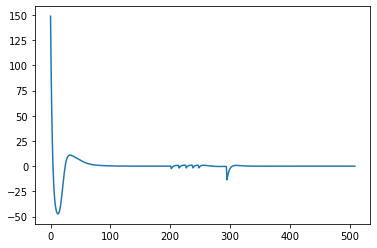

In [33]:
g = 9.8
M = 1.0
m = 0.1
l = 0.5
L = 2*l
I = m*L**2 / 12

# SENSORES.
# sensores[0]: posição.
# sensores[1]: velocidade.
# sensores[2]: ângulo.
# sensores[3]: velocidade angular.
# SETPOINT em env.xRef.

Sensores_sim=np.zeros(4)
# Função de controle: Ação nula.
def funcao_controle_1(sensores):
    Sensores_sim[0]=sensores[0]-env.xRef
    Sensores_sim[1]=sensores[1]
    Sensores_sim[2]=sensores[2]
    Sensores_sim[3]=sensores[3]
    acao=Rede.predict([Sensores_sim])
    print(acao)

    return acao

# Cria o ambiente de simulação.
env = InvertedPendulum(-0.5)

# Reseta o ambiente de simulação.
sensores = env.reset()
Vetacao = []
while True:
    # Renderiza o simulador.
    env.render()
    if env.finish:
        break
    
    # Calcula a ação de controle.
    acao = funcao_controle_1(sensores)  # É ESSA A FUNÇÃO QUE VOCÊS DEVEM PROJETAR.
    
    # Aplica a ação de controle.
    sensores = env.step(acao)
    Vetacao.append(acao)
env.close()

plt.plot(np.array(Vetacao))
plt.show